Lagrange's steepest descent by the undetermined multiplier method

In [32]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear'):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.lambdas = None
        self.X_train = None
        self.y_train = None

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)])
        )

        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

    # Predict function (optional for classification)
    def predict(self, X):
        predictions = np.sign(np.array([np.sum(self.lambdas * self.y_train *
                                                [self.kernel(x_i, x_j) for x_j in self.X_train]) for x_i in X]))
        return predictions


Support Vector Determination

In [33]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear'):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.lambdas = None
        self.X_train = None
        self.y_train = None

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)])
        )

        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

    # Predict function (optional for classification)
    def predict(self, X):
        predictions = np.sign(np.array([np.sum(self.lambdas * self.y_train *
                                                [self.kernel(x_i, x_j) for x_j in self.X_train]) for x_i in X]))
        return predictions

Estimated

In [34]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear', threshold=1e-5):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.threshold = threshold  # Hyperparameter for support vector threshold
        self.lambdas = None
        self.X_train = None
        self.y_train = None
        self.support_vectors = []  # List to store indices of support vectors

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)])
        )

        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

        # After training, determine the support vectors
        self.support_vectors = [i for i in range(n_samples) if self.lambdas[i] > self.threshold]

        # Output the number of support vectors
        print(f"Number of support vectors: {len(self.support_vectors)}")

    # Predict function
    def predict(self, X):
        predictions = np.sign(np.array([np.sum(self.lambdas * self.y_train *
                                                [self.kernel(x_i, x_j) for x_j in self.X_train]) for x_i in X]))
        return predictions


Learning and Estimation

In [35]:
import numpy as np

class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear', threshold=1e-5):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.threshold = threshold  # Hyperparameter for support vector threshold
        self.lambdas = None
        self.X_train = None
        self.y_train = None
        self.support_vectors = []  # List to store indices of support vectors
        self.support_vector_features = []  # Feature vectors of support vectors
        self.support_vector_labels = []  # Labels of support vectors

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)])
        )

        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

        # After training, determine the support vectors
        self.support_vectors = [i for i in range(n_samples) if self.lambdas[i] > self.threshold]

        # Store the feature vectors and labels of the support vectors
        self.support_vector_features = [self.X_train[i] for i in self.support_vectors]
        self.support_vector_labels = [self.y_train[i] for i in self.support_vectors]

        # Output the number of support vectors
        print(f"Number of support vectors: {len(self.support_vectors)}")

    # Estimate the decision function f(x) for a new sample x
    def estimate(self, x):
        f_x = 0
        for i, support_vector in enumerate(self.support_vectors):
            # Compute kernel between the new point x and each support vector
            f_x += self.lambdas[support_vector] * self.support_vector_labels[i] * self.kernel(x, self.support_vector_features[i])
        return f_x

    # Predict function (returns the classification result for new data)
    def predict(self, X):
        predictions = np.sign([self.estimate(x) for x in X])
        return predictions


Visualization of decision area

Number of support vectors: 47
Scratch SVM Classifier Performance:
Accuracy: 0.4666666666666667
Precision: 0.4666666666666667
Recall: 0.4666666666666667

Scikit-learn SVM Classifier Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


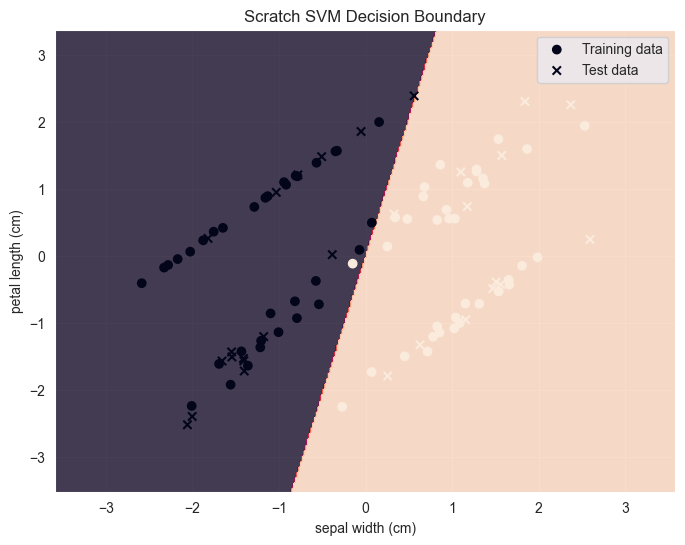

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate a simple binary classification dataset with 2 features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Scratch SVM Classifier Implementation
class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear', threshold=1e-5):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.threshold = threshold  # Hyperparameter for support vector threshold
        self.lambdas = None
        self.X_train = None
        self.y_train = None
        self.support_vectors = []  # List to store indices of support vectors
        self.support_vector_features = []  # Feature vectors of support vectors
        self.support_vector_labels = []  # Labels of support vectors

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)]))
        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

        # After training, determine the support vectors
        self.support_vectors = [i for i in range(n_samples) if self.lambdas[i] > self.threshold]

        # Store the feature vectors and labels of the support vectors
        self.support_vector_features = [self.X_train[i] for i in self.support_vectors]
        self.support_vector_labels = [self.y_train[i] for i in self.support_vectors]

        # Output the number of support vectors
        print(f"Number of support vectors: {len(self.support_vectors)}")

    # Estimate the decision function f(x) for a new sample x
    def estimate(self, x):
        f_x = 0
        for i, support_vector in enumerate(self.support_vectors):
            # Compute kernel between the new point x and each support vector
            f_x += self.lambdas[support_vector] * self.support_vector_labels[i] * self.kernel(x, self.support_vector_features[i])
        return f_x

    # Predict function (returns the classification result for new data)
    def predict(self, X):
        predictions = np.sign([self.estimate(x) for x in X])
        return predictions

# 2. Train the Scratch SVM Classifier
svm_scratch = ScratchSVMClassifier(alpha=0.01, threshold=1e-5)
svm_scratch.fit(X_train, y_train, num_iterations=100)

# Predict using the scratch SVM classifier
y_pred_scratch = svm_scratch.predict(X_test)

# 3. Train the Scikit-learn SVM Classifier
svm_sklearn = SVC(kernel='linear', C=1)
svm_sklearn.fit(X_train, y_train)

# Predict using the scikit-learn SVM classifier
y_pred_sklearn = svm_sklearn.predict(X_test)

# 4. Calculate Performance Metrics for both classifiers
# Accuracy, Precision, and Recall for Scratch SVM
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch, average='micro', zero_division=1)  # Handle zero division
recall_scratch = recall_score(y_test, y_pred_scratch, average='micro', zero_division=1)  # Handle zero division

# Accuracy, Precision, and Recall for Scikit-learn SVM
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='binary', zero_division=1)  # Handle zero division
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='binary', zero_division=1)  # Handle zero division

# Print comparison of results
print("Scratch SVM Classifier Performance:")
print(f"Accuracy: {accuracy_scratch}")
print(f"Precision: {precision_scratch}")
print(f"Recall: {recall_scratch}")

print("\nScikit-learn SVM Classifier Performance:")
print(f"Accuracy: {accuracy_sklearn}")
print(f"Precision: {precision_sklearn}")
print(f"Recall: {recall_sklearn}")

# Optionally, plot decision boundaries to visualize performance (for 2D dataset)
plt.figure(figsize=(8, 6))

# Plot scratch SVM decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z_scratch = np.array([svm_scratch.predict(np.c_[xx.ravel(), yy.ravel()])])
Z_scratch = Z_scratch.reshape(xx.shape)

plt.contourf(xx, yy, Z_scratch, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label="Test data")
plt.title("Scratch SVM Decision Boundary")
plt.xlabel('sepal width (cm)')
plt.ylabel('petal length (cm)')
plt.legend()
plt.show()


Number of support vectors: 47


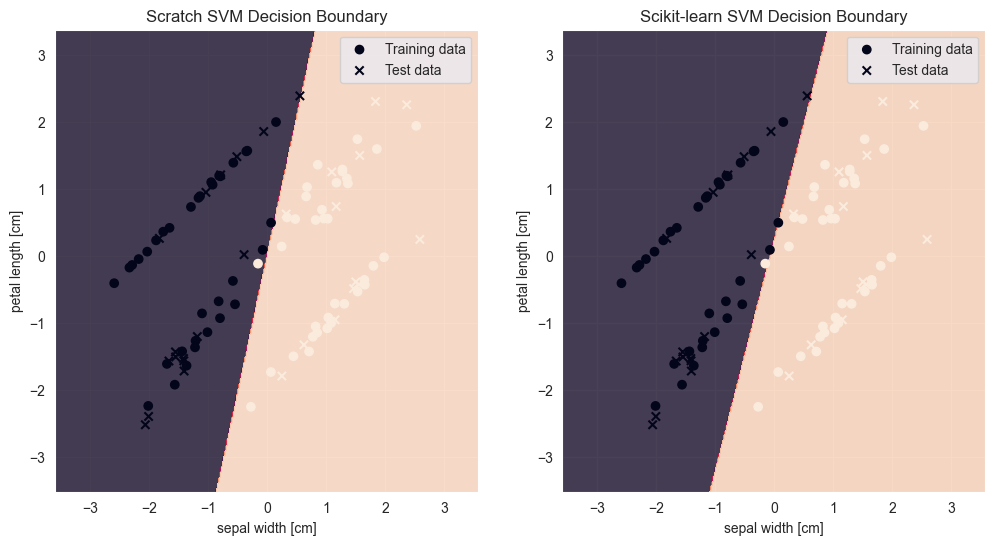

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate a simple binary classification dataset with 2 features
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Scratch SVM Classifier Implementation
class ScratchSVMClassifier:
    def __init__(self, alpha=0.01, kernel_type='linear', threshold=1e-5):
        self.alpha = alpha
        self.kernel_type = kernel_type
        self.threshold = threshold  # Hyperparameter for support vector threshold
        self.lambdas = None
        self.X_train = None
        self.y_train = None
        self.support_vectors = []  # List to store indices of support vectors
        self.support_vector_features = []  # Feature vectors of support vectors
        self.support_vector_labels = []  # Labels of support vectors

    # Linear kernel function
    def linear_kernel(self, x_i, x_j):
        return np.dot(x_i, x_j)  # x_i^T * x_j

    # Function to calculate the Lagrange multiplier update
    def update_lagrange_multipliers(self, i):
        n_samples = len(self.X_train)
        lambda_new = self.lambdas[i] + self.alpha * (
            1 - np.sum([self.lambdas[j] * self.y_train[i] * self.y_train[j] * self.kernel(self.X_train[i], self.X_train[j])
                        for j in range(n_samples)]))
        # Ensure that lambda_i >= 0
        self.lambdas[i] = max(0, lambda_new)

    # Function to set the kernel type (could be extended to other kernels like RBF)
    def kernel(self, x_i, x_j):
        if self.kernel_type == 'linear':
            return self.linear_kernel(x_i, x_j)
        else:
            raise NotImplementedError("Only 'linear' kernel is currently supported.")

    # Fit function to train the SVM model
    def fit(self, X_train, y_train, num_iterations=100):
        self.X_train = X_train
        self.y_train = y_train
        n_samples = len(X_train)

        # Initialize the Lagrange multipliers
        self.lambdas = np.zeros(n_samples)

        # Perform updates for a number of iterations
        for _ in range(num_iterations):
            for i in range(n_samples):
                self.update_lagrange_multipliers(i)

        # After training, determine the support vectors
        self.support_vectors = [i for i in range(n_samples) if self.lambdas[i] > self.threshold]

        # Store the feature vectors and labels of the support vectors
        self.support_vector_features = [self.X_train[i] for i in self.support_vectors]
        self.support_vector_labels = [self.y_train[i] for i in self.support_vectors]

        # Output the number of support vectors
        print(f"Number of support vectors: {len(self.support_vectors)}")

    # Estimate the decision function f(x) for a new sample x
    def estimate(self, x):
        f_x = 0
        for i, support_vector in enumerate(self.support_vectors):
            # Compute kernel between the new point x and each support vector
            f_x += self.lambdas[support_vector] * self.support_vector_labels[i] * self.kernel(x, self.support_vector_features[i])
        return f_x

    # Predict function (returns the classification result for new data)
    def predict(self, X):
        predictions = np.sign([self.estimate(x) for x in X])
        return predictions

# 2. Train the Scratch SVM Classifier
svm_scratch = ScratchSVMClassifier(alpha=0.01, threshold=1e-5)
svm_scratch.fit(X_train, y_train, num_iterations=100)

# Predict using the scratch SVM classifier
y_pred_scratch = svm_scratch.predict(X_test)

# 3. Train the Scikit-learn SVM Classifier
svm_sklearn = SVC(kernel='linear', C=1)
svm_sklearn.fit(X_train, y_train)

# Predict using the scikit-learn SVM classifier
y_pred_sklearn = svm_sklearn.predict(X_test)

# 4. Visualize Decision Boundaries for both classifiers

# Create a mesh grid to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Decision boundary for Scratch SVM
Z_scratch = np.array([svm_scratch.predict(np.c_[xx.ravel(), yy.ravel()])])
Z_scratch = Z_scratch.reshape(xx.shape)

# Decision boundary for Scikit-learn SVM
Z_sklearn = svm_sklearn.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sklearn = Z_sklearn.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(12, 6))

# Plot Scratch SVM Decision Boundary
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_scratch, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,  marker='o', label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test,  marker='x', label="Test data")
plt.title("Scratch SVM Decision Boundary")
plt.legend()
plt.ylabel('petal length [cm]')
plt.xlabel('sepal width [cm]')

# Plot Scikit-learn SVM Decision Boundary
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_sklearn, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label="Training data")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label="Test data")
plt.title("Scikit-learn SVM Decision Boundary")
plt.legend()
plt.ylabel('petal length [cm]')
plt.xlabel('sepal width [cm]')

plt.show()
